170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
 Extracting HOG features
HOG done in 25.64 seconds.

 Running RandomizedSearchCV (20 iterations, 4-fold CV)
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 Best Parameters Found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

 Train Accuracy: 0.9996
 Test Accuracy : 0.5260

 Classification Report:
              precision    recall  f1-score   support

    airplane       0.61      0.61      0.61      1000
  automobile       0.59      0.68      0.63      1000
        bird       0.50      0.35      0.41      1000
         cat       0.43      0.24      0.31      1000
        deer       0.44      0.47      0.46      1000
         dog       0.39      0.47      0.43      1000
        frog       0.48      0.67      0.56      1000
       horse       0.61      0.53      0.57      1000
        ship       0.61      0.62      0.61      1000
       truck       0.59      0.62      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000



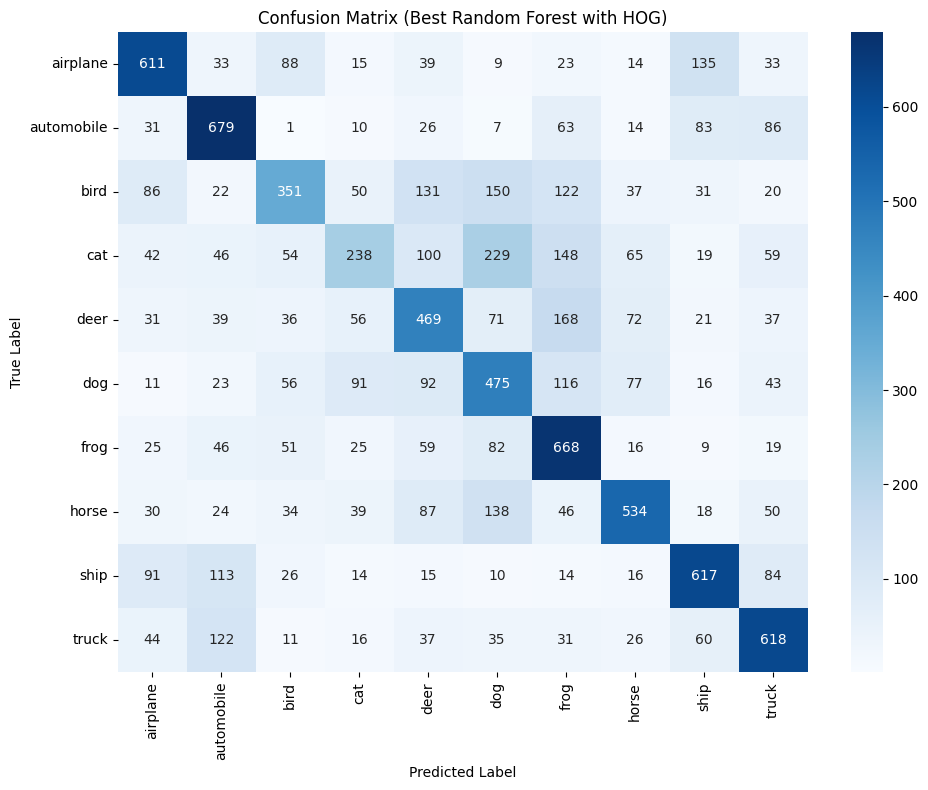

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from skimage.feature import hog
from skimage.color import rgb2gray
import seaborn as sns
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Convert to grayscale
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# Extract HOG features
print(" Extracting HOG features")
start_time = time.time()
x_train_hog = np.array([
    hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    for img in x_train_gray
])
x_test_hog = np.array([
    hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    for img in x_test_gray
])
print(f"HOG done in {time.time() - start_time:.2f} seconds.")

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Randomized hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

# RandomizedSearchCV setup
print("\n Running RandomizedSearchCV (20 iterations, 4-fold CV)")
model = RandomForestClassifier(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,
    cv=4,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
# Fit the model
search.fit(x_train_hog, y_train)

# Best estimator and results
print("\n Best Parameters Found:")
print(search.best_params_)

best_model = search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(x_test_hog)
test_acc = accuracy_score(y_test, y_pred)
train_acc = best_model.score(x_train_hog, y_train)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Best Random Forest with HOG)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
